In [1]:
#for data analysis and modeling
import tensorflow as tf
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing import text, sequence 
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
#for text cleaning
import string
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#for visualization
import matplotlib.pyplot as plt


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Loading data and visualizing

In [2]:
df = pd.read_csv('/kaggle/input/adddata/sample_data.csv')
df.head()

,index,Headline,Text_of_Speech,Emotion,text,cleaned_texts
0,0,Speech at a conference of the heads of republi...,"Esteemed Mr Lebedev,\n\nLadies and Gentlemen:\...",UPSET,Speech at a conference of the heads of republi...,Speech at a conference of the heads of republi...
1,1,Remarks by President Biden on Fighting the COV...,"THE PRESIDENT: Good evening, my fellow Americ...",OPTIMISM,Remarks by President Biden on Fighting the COV...,Remarks by President Biden on Fighting the COV...
2,2,Excerpts from the Opening Speech at a Session ...,"Good afternoon, dear colleagues,\n\nOur meetin...",NEUTRAL,Excerpts from the Opening Speech at a Session ...,Excerpts from the Opening Speech at a Session ...
3,3,\nStatement by the President,"Good afternoon, everybody. This sound system i...",NEUTRAL,"\nStatement by the President Good afternoon, e...",Statement by the President Good afternoon eve...
4,4,Statement by President Biden on the Attack on ...,More Americans voted in the 2020 elections tha...,UPSET,Statement by President Biden on the Attack on ...,Statement by President Biden on the Attack on ...


In [3]:
%%time
def clean_text(txt):
    """""
    cleans the input text in the following steps
    1- replace contractions
    2- removing punctuation
    3- spliting into words
    4- removing stopwords
    5- removing leftover punctuations
    """""
    contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}
    def _get_contractions(contraction_dict):
        contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
        return contraction_dict, contraction_re

    def replace_contractions(text):
        contractions, contractions_re = _get_contractions(contraction_dict)
        def replace(match):
            return contractions[match.group(0)]
        return contractions_re.sub(replace, text)

    # replace contractions
    txt = replace_contractions(txt)
    
    #remove punctuations
    txt  = "".join([char for char in txt if char not in string.punctuation])
    txt = re.sub('[0-9]+', '', txt)
    
    # split into words
    words = word_tokenize(txt)
    
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    
    # removing leftover punctuations
    words = [word for word in words if word.isalpha()]
    
    cleaned_text = ' '.join(words)
    return cleaned_text
    
df['data_cleaned1'] = df['cleaned_texts'].apply(lambda txt: clean_text(txt))


CPU times: user 22.1 s, sys: 57.8 ms, total: 22.1 s
Wall time: 22.2 s


In [4]:
df['data_cleaned1']

0       Speech conference heads republican regional co...
1       Remarks President Biden Fighting COVID Pandemi...
2       Excerpts Opening Speech Session State Council ...
3       Statement President Good afternoon everybody T...
4       Statement President Biden Attack Right Vote Ge...
                              ...                        
1600    Boris Johnson first speech Prime Minister July...
1601    Statement President Joe Biden On Black History...
1602    Remarks President Meeting State Legislators Th...
1603    Let Us Strengthen Confidence Solidarity Jointl...
1604    Making Unremitting Efforts New Model Major Cou...
Name: data_cleaned1, Length: 1605, dtype: object

In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Emotion'] = label_encoder.fit_transform(df['Emotion'])

In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(df['data_cleaned1'], df['Emotion'], shuffle=True, test_size=0.2)
# find the length of the largest sentence in training data
max_len = xtrain.apply(lambda x: len(x)).max()
print(f'Max number of words in a text in training data: {max_len}')

Max number of words in a text in training data: 22463


In [7]:
max_words = 27000
tokenizer = text.Tokenizer(num_words = max_words)
# create the vocabulary by fitting on x_train text
tokenizer.fit_on_texts(xtrain)
# generate the sequence of tokens
xtrain_seq = tokenizer.texts_to_sequences(xtrain)
xtest_seq = tokenizer.texts_to_sequences(xtest)

# pad the sequences
xtrain_pad = sequence.pad_sequences(xtrain_seq, maxlen=max_len)
xtest_pad = sequence.pad_sequences(xtest_seq, maxlen=max_len)
word_index = tokenizer.word_index

print('text example:', xtrain[0])
print('sequence of indices(before padding):', xtrain_seq[0])
print('sequence of indices(after padding):', xtrain_pad[0])

text example: Speech conference heads republican regional courts Esteemed Mr Lebedev Ladies Gentlemen You gathered sum results past year But I sure end discussion This year Russia turned new page history This right time openly discuss changes taken place judicial system last decade look like near future Of legal professionals judges always enjoyed special prestige praised measured approach words actions In hands law acquires real power becomes instrument upholding justice You acting behalf state hand verdicts behalf Russian Federation A court law means power enormous power entails huge responsibilities The usual view court disciplinary machine giving speedy always fair judgment confined past The habit seeking protection superiors replaced people minds understanding convenience advantages taking matter court defending rights assistance Today citizens willingly frequently But judicial systems courts live higher expectations This going talk This good opportunity ponder current condition j

In [8]:
%%time
embedding_vectors = {}
# with open('/kaggle/input/glove6b100d/glove.6B.100d.txt','r',encoding='utf-8') as file:
with open('/kaggle/input/glove300/glove.6B.300d.txt','r',encoding='utf-8') as file:
    for row in file:
        values = row.split(' ')
        word = values[0]
        weights = np.asarray([float(val) for val in values[1:]])
        embedding_vectors[word] = weights
print(f"Size of vocabulary in GloVe: {len(embedding_vectors)}")   


Size of vocabulary in GloVe: 400000
CPU times: user 40.7 s, sys: 905 ms, total: 41.6 s
Wall time: 41.7 s


In [9]:
#initialize the embedding_matrix with zeros
emb_dim = 300
if max_words is not None: 
    vocab_len = max_words 
else:
    vocab_len = len(word_index)+1
embedding_matrix = np.zeros((vocab_len, emb_dim))
oov_count = 0
oov_words = []
for word, idx in word_index.items():
    if idx < vocab_len:
        embedding_vector = embedding_vectors.get(word)
        if embedding_vector is not None:
            embedding_matrix[idx] = embedding_vector
        else:
            oov_count += 1 
            oov_words.append(word)
#print some of the out of vocabulary words
print(f'Some out of valubulary words: {oov_words[0:5]}')

Some out of valubulary words: ['covid', 'isil', 'aiib', 'ceec', 'brexit']


In [10]:
print(f'{oov_count} out of {vocab_len} words were OOV.')

985 out of 27000 words were OOV.


# Modeling
Now, we can create a model and pre-train the embedding layer with the embedding matrix we just created based on GloVe vectors. You saw the [model overview](#model_overview) above. The first layer is Embedding. Embedding layer by Keras is a flexible layer that can be used also without any pre-trained weights. In that case, the Embedding layer is initialized with random weights and will learn an embedding for all of the words in the training dataset. In this exercise, we will set the weights of the Embedding layer to the embedding matrix from GloVe pre-trained vectors.This is a tranfer learning. 

Another parameter in Embedding layer is "trainable" which can be set to True in case you want to fine-tune the word embedding or if you don't want the embedding weights to be updated you can set it to False. Here, we set it to False.<br>

After the Embedding layer, we have a layer of LSTM or GRU and then a Dropout layer for regularization. 

Then we have a Dense layer with Sigmoid activation which transforms the output of previous layers to 0 or 1 (real or fake). 


## LSTM
Let's start with LSTM models.

In [11]:
from tensorflow.keras.layers import Input, Dense, LSTM, Dropout, GlobalMaxPooling1D, Bidirectional

In [12]:
lstm_model = Sequential()
lstm_model.add(Embedding(vocab_len, emb_dim, trainable = False, weights=[embedding_matrix]))
lstm_model.add(Bidirectional(LSTM(128, return_sequences=True)))
lstm_model.add(GlobalMaxPooling1D())
lstm_model.add(Dense(len(label_encoder.classes_), activation='softmax'))
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(lstm_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 300)         8100000   
                                                                 
 bidirectional (Bidirectiona  (None, None, 256)        439296    
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 256)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 4)                 1028      
                                                                 
Total params: 8,540,324
Trainable params: 440,324
Non-trainable params: 8,100,000
_________________________________________________________________
None


In [13]:
%%time
batch_size = 32
epochs  = 10
history = lstm_model.fit(xtrain_pad, np.asarray(ytrain), validation_data=(xtest_pad, np.asarray(ytest)), batch_size = batch_size, epochs = epochs)


Epoch 1/10
41/41 [==============================] - 107s 2s/step - loss: 1.2844 - accuracy: 0.3801 - val_loss: 1.1884 - val_accuracy: 0.4611
Epoch 2/10
41/41 [==============================] - 101s 2s/step - loss: 1.0669 - accuracy: 0.5537 - val_loss: 1.1429 - val_accuracy: 0.4704
Epoch 3/10
41/41 [==============================] - 101s 2s/step - loss: 0.9401 - accuracy: 0.6301 - val_loss: 1.1210 - val_accuracy: 0.4829
Epoch 4/10
41/41 [==============================] - 101s 2s/step - loss: 0.8498 - accuracy: 0.6939 - val_loss: 1.1465 - val_accuracy: 0.4984
Epoch 5/10
41/41 [==============================] - 101s 2s/step - loss: 0.7383 - accuracy: 0.7632 - val_loss: 1.1176 - val_accuracy: 0.4611
Epoch 6/10
41/41 [==============================] - 101s 2s/step - loss: 0.6375 - accuracy: 0.8193 - val_loss: 1.1700 - val_accuracy: 0.4922
Epoch 7/10
41/41 [==============================] - 101s 2s/step - loss: 0.5541 - accuracy: 0.8629 - val_loss: 1.1132 - val_accuracy: 0.4579
Epoch 8/10
41

In [ ]:
lstm_model.save(model.h5)

## LSTM - Evaluation

Let's find the accuracy of training and testing dataset below:

Text(0.5, 1.0, 'Accuracy')

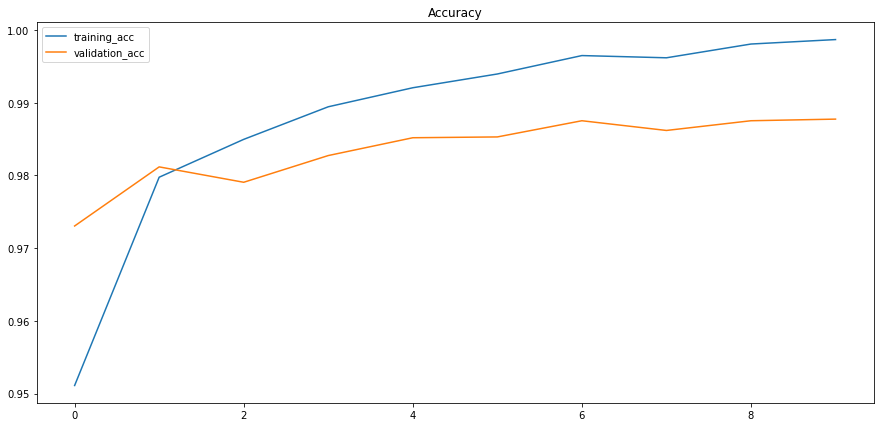

In [15]:
#plot accuracy
plt.figure(figsize=(15, 7))
plt.plot(range(epochs), history.history['accuracy'])
plt.plot(range(epochs), history.history['val_accuracy'])
plt.legend(['training_acc', 'validation_acc'])
plt.title('Accuracy')

In [16]:

train_lstm_results = lstm_model.evaluate(xtrain_pad, np.asarray(ytrain), verbose=0, batch_size=256)
test_lstm_results = lstm_model.evaluate(xtest_pad, np.asarray(ytest), verbose=0, batch_size=256)
print(f'Train accuracy: {train_lstm_results[1]*100:0.2f}')
print(f'Test accuracy: {test_lstm_results[1]*100:0.2f}')

Train accuracy: 99.92

Test accuracy: 98.78
